In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
import datetime
import praw

#Panda pour créer des DataFrames
#Re pour gérer les expressions régulières ( elimination des caractéres spéciaux )
#Numpy pour des fonctions mathématiques
#matplotlib pour générer les graphes 
#Les pipelines sont utilisés pour diviser vos flux de travail d'apprentissage automatique
#Praw est l'api Reddit qui nous permet de générer notre DataSet


sentiment_classifier = pipeline('sentiment-analysis')

2023-01-09 21:01:18.933784: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
    r = praw.Reddit(
        client_id="btilXN1g1cyFVXn2MJYiNg",
        client_secret="mt87op4z45lRODdGt1KN35q2yvBabw",
        password="Chadio300+",
        user_agent="Med_Chadi13v1",
        username="Med_Chadi13",
    )
    
    #r constitue l'instance qui permet d'interagir avec l'API de Reddit via PRAW

In [5]:
    subreddit = r.subreddit('worldcup')
    #subreddit permet de generer les publications du subreddit WorldCup
    hot_WC =subreddit.hot(limit=300)
    #On stocke au niveau de hot_WC les 300 premieres publications TRENDING
    post_list=[]
    for sub in hot_WC:
        post_list.append([sub.id,sub.permalink,sub.title,sub.ups,sub.author_flair_text,sub.author,datetime.datetime.fromtimestamp(sub.created)])
    
    reddit_posts = pd.DataFrame(post_list,columns=["Reddit_Id","Permalink","Title","Upvotes","Flair","Author","Time"])
   #Creation d'un Dataframe qui contient les publications de hot_WC avec les attributs ci-dessus.
    #reddit_posts constitue notre DataSet
   


In [6]:
reddit_posts

,Reddit_Id,Permalink,Title,Upvotes,Flair,Author,Time
0,zz4nxj,/r/worldcup/comments/zz4nxj/moderator_recruitm...,[Moderator Recruitment & Feedback] Officially ...,9,:England: England,Zee-Man123,2022-12-30 17:26:51
1,107c3ix,/r/worldcup/comments/107c3ix/how_many_qualific...,How many qualification spots does Concacaf hav...,59,:Iran: Iran,HamzaTheBeastgaming0,2023-01-09 12:25:41
2,106fwcp,/r/worldcup/comments/106fwcp/2022_qatar_world_...,"2022 Qatar World Cup Summary, Journey of Teams...",3485,:Brazil: Brazil,Knight_TheRider,2023-01-08 11:19:04
3,106w0xq,/r/worldcup/comments/106w0xq/question_of_the_d...,Question of the day! Will the United States wi...,189,None,IllustriousClaim317,2023-01-08 23:13:15
4,107novb,/r/worldcup/comments/107novb/france_world_cup_...,France World Cup Song (this title is now 50 ch...,3,:Argentina: Argentina,CopyPetPet,2023-01-09 20:39:17
...,...,...,...,...,...,...,...
295,zs149g,/r/worldcup/comments/zs149g/that_messi_moment_...,That Messi Moment That Had All Fans in Tears a...,2,None,UncleBilo,2022-12-21 22:14:55
296,zqlot3,/r/worldcup/comments/zqlot3/beautiful_morning_...,Beautiful morning innit? He is trolling at thi...,1028,None,TheSilverHound,2022-12-20 12:08:51
297,zqi9o1,/r/worldcup/comments/zqi9o1/salt_bae_prying_th...,“Salt Bae” prying the World Cup trophy from Cr...,1808,None,Christinedrink,2022-12-20 08:47:54
298,zqksrl,/r/worldcup/comments/zqksrl/crowd_hands_messi_...,Crowd hands Messi a TMNT plush during Argentin...,1065,None,ThreeArr0ws,2022-12-20 11:15:01


# Méthode nlp_pipeline qui permet d'éliminer les caractéres alphanumériques

In [7]:
 
def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\_", "", text)
    text = re.sub(r"\[", "", text)
    text = re.sub(r"\]", "", text)
    text = re.sub(r"\«", "", text)
    text = re.sub(r"\»", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text
    
    
    
#body reçoit tous les élements de la colonne title    
body = reddit_posts['Title']

#Élimination des caractéres inutiles sur tous les enregistrement
#body.apply remplace une boucle for , elle permet de parcourir les élements et les faires passer par le traitement nlp_pipeline
body_cleaned = body.apply(nlp_pipeline)
body_cleaned
reddit_posts['Title']=body_cleaned



In [8]:
reddit_posts.head()
#head retourne les 5 premiers enregistrements

,Reddit_Id,Permalink,Title,Upvotes,Flair,Author,Time
0,zz4nxj,/r/worldcup/comments/zz4nxj/moderator_recruitm...,moderator recruitment feedback officially recr...,9,:England: England,Zee-Man123,2022-12-30 17:26:51
1,107c3ix,/r/worldcup/comments/107c3ix/how_many_qualific...,how many qualification spots does concacaf hav...,59,:Iran: Iran,HamzaTheBeastgaming0,2023-01-09 12:25:41
2,106fwcp,/r/worldcup/comments/106fwcp/2022_qatar_world_...,qatar world cup summary journey of teams in ...,3485,:Brazil: Brazil,Knight_TheRider,2023-01-08 11:19:04
3,106w0xq,/r/worldcup/comments/106w0xq/question_of_the_d...,question of the day will the united states win...,189,None,IllustriousClaim317,2023-01-08 23:13:15
4,107novb,/r/worldcup/comments/107novb/france_world_cup_...,france world cup song this title is now chara...,3,:Argentina: Argentina,CopyPetPet,2023-01-09 20:39:17


## La création d'une copie pour préserver les données originales

In [10]:
dataframe_copy = reddit_posts[['Reddit_Id','Time', 'Title','Upvotes','Author']]
dataframe_copy

,Reddit_Id,Time,Title,Upvotes,Author
0,zz4nxj,2022-12-30 17:26:51,moderator recruitment feedback officially recr...,9,Zee-Man123
1,107c3ix,2023-01-09 12:25:41,how many qualification spots does concacaf hav...,59,HamzaTheBeastgaming0
2,106fwcp,2023-01-08 11:19:04,qatar world cup summary journey of teams in ...,3485,Knight_TheRider
3,106w0xq,2023-01-08 23:13:15,question of the day will the united states win...,189,IllustriousClaim317
4,107novb,2023-01-09 20:39:17,france world cup song this title is now chara...,3,CopyPetPet
...,...,...,...,...,...
295,zs149g,2022-12-21 22:14:55,that messi moment that had all fans in tears a...,2,UncleBilo
296,zqlot3,2022-12-20 12:08:51,beautiful morning innit he is trolling at this...,1028,TheSilverHound
297,zqi9o1,2022-12-20 08:47:54,“salt bae” prying the world cup trophy from cr...,1808,Christinedrink
298,zqksrl,2022-12-20 11:15:01,crowd hands messi a tmnt plush during argentin...,1065,ThreeArr0ws


In [12]:
!pip install spacy
#Conjonction de coordination
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
stopwords_list =  ["httpst","co","x","https"] + list(en_stop)

# Génération de nuage de cloud

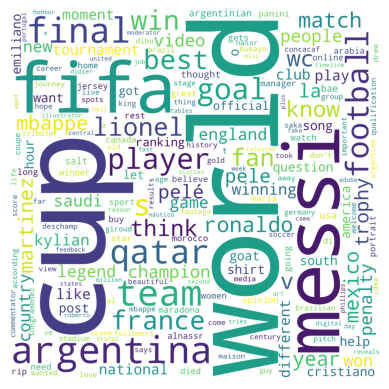

In [13]:
!pip install wordcloud
from matplotlib import pyplot as plt

#Librairie pour génerer des Nuage de mots-clés
from wordcloud import WordCloud

#Creation d'une liste de mots de la colonne title séparé par espace
keywords = dataframe_copy['Title'].apply(lambda x: ''.join(x)).str.cat(sep=' ')
#Affecter au parametre stopwords les mots à négliger
wordcloud = WordCloud(stopwords=stopwords_list,
                            background_color='white',
                            collocations=False,
                            width=2000,
                            height=2000
                         ).generate(keywords)
plt.axis('off')
plt.imshow(wordcloud)

<AxesSubplot:>

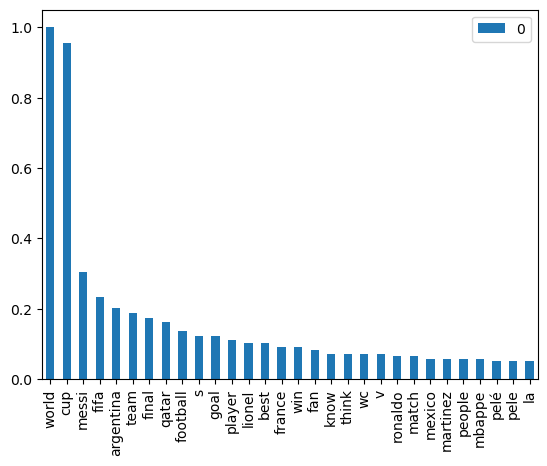

In [33]:
#Dictionnaire qui contient les mots du cloud précedent associe les mots avec leurs taux de répetitions
occurence_dataframe = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
occurence_dataframe = occurence_dataframe.head(30)
occurence_dataframe.plot.bar()

## L'application du modèle d'analyse de sentiments


In [23]:
dataframe_copy = (
    dataframe_copy
    .assign(sentiment = lambda x: x['Title'].apply(lambda s: sentiment_classifier(s)))#Ajouter une colonne sentiment qui contient le resulat obtenue par la méthode sentiment_classifier
    .assign(
         label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
         score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
    )
)

In [24]:
dataframe_copy

,Reddit_Id,Time,Title,Upvotes,Author,sentiment,label,score
0,zz4nxj,2022-12-30 17:26:51,moderator recruitment feedback officially recr...,9,Zee-Man123,"[{'label': 'NEGATIVE', 'score': 0.952126860618...",NEGATIVE,0.952127
1,107c3ix,2023-01-09 12:25:41,how many qualification spots does concacaf hav...,59,HamzaTheBeastgaming0,"[{'label': 'POSITIVE', 'score': 0.932977080345...",POSITIVE,0.932977
2,106fwcp,2023-01-08 11:19:04,qatar world cup summary journey of teams in ...,3485,Knight_TheRider,"[{'label': 'POSITIVE', 'score': 0.997841835021...",POSITIVE,0.997842
3,106w0xq,2023-01-08 23:13:15,question of the day will the united states win...,189,IllustriousClaim317,"[{'label': 'NEGATIVE', 'score': 0.921105861663...",NEGATIVE,0.921106
4,107novb,2023-01-09 20:39:17,france world cup song this title is now chara...,3,CopyPetPet,"[{'label': 'NEGATIVE', 'score': 0.557257413864...",NEGATIVE,0.557257
...,...,...,...,...,...,...,...,...
295,zs149g,2022-12-21 22:14:55,that messi moment that had all fans in tears a...,2,UncleBilo,"[{'label': 'NEGATIVE', 'score': 0.989363372325...",NEGATIVE,0.989363
296,zqlot3,2022-12-20 12:08:51,beautiful morning innit he is trolling at this...,1028,TheSilverHound,"[{'label': 'NEGATIVE', 'score': 0.521706223487...",NEGATIVE,0.521706
297,zqi9o1,2022-12-20 08:47:54,“salt bae” prying the world cup trophy from cr...,1808,Christinedrink,"[{'label': 'NEGATIVE', 'score': 0.914150238037...",NEGATIVE,0.914150
298,zqksrl,2022-12-20 11:15:01,crowd hands messi a tmnt plush during argentin...,1065,ThreeArr0ws,"[{'label': 'NEGATIVE', 'score': 0.965395450592...",NEGATIVE,0.965395


##### Si la valeur est Positive le score est mis à 1 , 0 sinon

In [26]:
#Ajouter une colonne Target qui reçoit 1 si le label est POSITIVE et 0 sinon
dataframe_copy['target'] = np.where(dataframe_copy['label'] == 'POSITIVE', 1, 0)
dataframe_copy
#On stocke notre DataFrame sous format CSV dans le chemin relatif indiqué
dataframe_copy.to_csv("RedditSentimentAnalysis.csv", sep='\t', encoding='utf-8')



In [31]:
from numpy.random import RandomState
random = RandomState()
#Cette méthode renvoie un échantillon aléatoire des données,avec frac la fraction de la data , et le parametre random_state permet de choisir des valeurs aléatoirement
trained_data = dataframe_copy.sample(frac=0.7, random_state=random)
trained_data

,Reddit_Id,Time,Title,Upvotes,Author,sentiment,label,score,target
268,zra4b0,2022-12-21 05:22:04,what if he didn’t wingoat without worldcup is ...,300,ConsiderationOther,"[{'label': 'NEGATIVE', 'score': 0.999302744865...",NEGATIVE,0.999303,0
229,zst8bu,2022-12-22 19:31:51,what are these symbols gift for the holidays,30,Empty_Locksmith12,"[{'label': 'POSITIVE', 'score': 0.999680757522...",POSITIVE,0.999681,1
168,zuhgsd,2022-12-24 20:59:34,wc final messi fans celebrate after full time ...,292,anonz555,"[{'label': 'POSITIVE', 'score': 0.999269902706...",POSITIVE,0.999270,1
23,105sam1,2023-01-07 16:57:29,france world cup songramenez la coupe à la mai...,1,Many-Document7248,"[{'label': 'POSITIVE', 'score': 0.975610673427...",POSITIVE,0.975611,1
263,zsuuc6,2022-12-22 20:40:07,check out this video that explores the class s...,0,Future_Captain234,"[{'label': 'POSITIVE', 'score': 0.998004138469...",POSITIVE,0.998004,1
...,...,...,...,...,...,...,...,...,...
217,ztb4ze,2022-12-23 10:25:45,there was not handball by upamecano vs argenti...,10,AppropriateDocument8,"[{'label': 'POSITIVE', 'score': 0.620943069458...",POSITIVE,0.620943,1
55,101qi69,2023-01-02 23:55:49,west germany versus netherlands world cup final,49,Sad-Figure800,"[{'label': 'POSITIVE', 'score': 0.876562476158...",POSITIVE,0.876562,1
119,zww89m,2022-12-28 02:16:41,great edit on how different things can be afte...,3201,AnaPaulaV90,"[{'label': 'POSITIVE', 'score': 0.999601304531...",POSITIVE,0.999601,1
172,zufs7p,2022-12-24 19:36:15,i drew messi in anime style inspired from blue...,74,ZerooSK,"[{'label': 'POSITIVE', 'score': 0.989720165729...",POSITIVE,0.989720,1


In [37]:
#Récuperer les enregistrement qui figurent dans le datatest mais pas dans les données d'entrainement ( train_data )
test_data = dataframe_copy.loc[~dataframe_copy.index.isin(trained_data.index)]

#Generation de fichiers csv contenant les données d'entrainement et de test
trained_data.to_csv("trained_data.csv", encoding='utf-8')
test_data.to_csv("test_data.csv", encoding='utf-8')

# Lancement d'une session Spark pour appliquer le modèle

In [3]:
!pip install pyspark
#Creation d'une session Spark
from pyspark.sql import SparkSession

#CountVectorizer pour convertir une collection de documents texte en une matrice de décomptes de jetons.
#RegexTokenizer génération de token en utilisant les expressions regulieres
from pyspark.ml.feature import CountVectorizer, RegexTokenizer, StopWordsRemover
#Regexp_replace remplace toutes les occurrences d'un modèle d'expression régulière dans une chaîne ou un texte par une chaîne de remplacement.
from pyspark.sql.functions import col, regexp_replace
#Algorithme de ML Pour les tâches de classification
from pyspark.ml.classification import NaiveBayes
#Evaluation des classes obtenues
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [5]:
#Création d'une session Spark si aucune n'existe
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/10 21:16:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
#lecture en dataframe spark
training_spark_dataframe = spark.read.csv('trained_data.csv', header = True, inferSchema = True)
test_spark_dataframe = spark.read.csv('test_data.csv', inferSchema=True, header=True)
spark_dataframe_sample_train = training_spark_dataframe.withColumnRenamed("_c0","id")
spark_dataframe_sample_test = test_spark_dataframe.withColumnRenamed("_c0","id")
spark_dataframe_sample_train.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Reddit_Id: string (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Title: string (nullable = true)
 |-- Upvotes: integer (nullable = true)
 |-- Author: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- label: string (nullable = true)
 |-- score: double (nullable = true)
 |-- target: integer (nullable = true)



In [7]:
spark_dataframe_sample_train.show()

23/01/10 21:17:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Reddit_Id, Time, Title, Upvotes, Author, sentiment, label, score, target
 Schema: _c0, Reddit_Id, Time, Title, Upvotes, Author, sentiment, label, score, target
Expected: _c0 but found: 
CSV file: file:///Users/user/Downloads/Spark-twitter-project-main/trained_data.csv
+---+---------+-------------------+--------------------+-------+--------------------+--------------------+--------+------------------+------+
| id|Reddit_Id|               Time|               Title|Upvotes|              Author|           sentiment|   label|             score|target|
+---+---------+-------------------+--------------------+-------+--------------------+--------------------+--------+------------------+------+
|268|   zra4b0|2022-12-21 05:22:04|what if he didn’t...|    300|  ConsiderationOther|[{'label': 'NEGAT...|NEGATIVE|0.9993027448654175|     0|
|229|   zst8bu|2022-12-22 19:31:51|what are these sy...|     30|   E

In [8]:
spark_dataframe_sample_train.select('Title','Author').show()
spark_dataframe_sample_train.filter( 'sentiment > 0.5').show()

+--------------------+--------------------+
|               Title|              Author|
+--------------------+--------------------+
|what if he didn’t...|  ConsiderationOther|
|what are these sy...|   Empty_Locksmith12|
|wc final messi fa...|            anonz555|
|france world cup ...|   Many-Document7248|
|check out this vi...|   Future_Captain234|
|wikileaks  world ...|         ponopono88i|
|olivier giroud 'p...|        Buckeye_8621|
|does anyone know ...|    yes_ofcourse_sir|
|argentine fans bu...|      Gatekeeper2019|
|fifa's new rankin...|            Nuthin07|
|which team or tea...|        BO55TRADAMU5|
|what would be you...|     MichaelTheKing7|
|this is a banglad...|            METAx007|
|context copa amer...|        GordoBostero|
|scariest football...|Relative-Article3835|
|fifa have announc...|            marshsyl|
|arregla tus balon...|     Local_Shape9254|
|where can i watch...|      Mansillystring|
|my world cup expe...|  MrRandomRedditDude|
|france football c...|          

# RegexTokenizer

In [9]:
dataframe_treatment = spark_dataframe_sample_train.select("Reddit_Id","Title","target")
#Suppression des données NA
dataframe_treatment = dataframe_treatment.dropna()
#Elimine les chaines avec l'expression réguliere [0-9]+
dataframe_treatment = dataframe_treatment.withColumn("only_str",regexp_replace(col('Title'), '\d+', ''))
# Separation des publications en des mots avec regexTokenizer
regex_tokenizer = RegexTokenizer(inputCol="only_str", outputCol="words", pattern="\\W")
regex_tokenizer
#Ajout de la colonne words et transformation en dataframe
raw_words = regex_tokenizer.transform(dataframe_treatment)
raw_words.show(5)

+---------+--------------------+------+--------------------+--------------------+
|Reddit_Id|               Title|target|            only_str|               words|
+---------+--------------------+------+--------------------+--------------------+
|   zra4b0|what if he didn’t...|     0|what if he didn’t...|[what, if, he, di...|
|   zst8bu|what are these sy...|     1|what are these sy...|[what, are, these...|
|   zuhgsd|wc final messi fa...|     1|wc final messi fa...|[wc, final, messi...|
|  105sam1|france world cup ...|     1|france world cup ...|[france, world, c...|
|   zsuuc6|check out this vi...|     1|check out this vi...|[check, out, this...|
+---------+--------------------+------+--------------------+--------------------+
only showing top 5 rows



In [10]:
# Suppression des stop words
suppression = StopWordsRemover(inputCol="words", outputCol="filtered")
mots = suppression.transform(raw_words)
#Mots apres supression des stop words sont affichés dans la colonne filtered
mots.select("Reddit_id","words","target","filtered").show(5, truncate=False)

23/01/10 21:17:13 WARN StopWordsRemover: Default locale set was [en_MA]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.
+---------+----------------------------------------------------------------------------------------------------------------------+------+----------------------------------------------------------------------+
|Reddit_id|words                                                                                                                 |target|filtered                                                              |
+---------+----------------------------------------------------------------------------------------------------------------------+------+----------------------------------------------------------------------+
|zra4b0   |[what, if, he, didn, t, wingoat, without, worldcup, is, unacceptable, for, many, people]                              |0     |[didn, wingoat, without

In [28]:
# Transformation des mots en vecteurs
#CountVectorizer pour convertir une collection de documents texte en une matrice de décomptes de jetons.
occurence = CountVectorizer(inputCol="filtered", outputCol="features")

# Ponderation des mots en utilisant le CountVectorizer
# fit permet de creer le vocabulaire en se basant sur le dataset d'entrainement
model = occurence.fit(mots)

In [29]:
train_countVectorizer = model.transform(mots)
train_countVectorizer = train_countVectorizer.withColumn("label",col('target'))
train_countVectorizer.show(5)

+---------+--------------------+------+--------------------+--------------------+--------------------+--------------------+-----+
|Reddit_Id|               Title|target|            only_str|               words|            filtered|            features|label|
+---------+--------------------+------+--------------------+--------------------+--------------------+--------------------+-----+
|   zra4b0|what if he didn’t...|     0|what if he didn’t...|[what, if, he, di...|[didn, wingoat, w...|(916,[21,32,167,2...|    0|
|   zst8bu|what are these sy...|     1|what are these sy...|[what, are, these...|[symbols, gift, h...|(916,[331,358,666...|    1|
|   zuhgsd|wc final messi fa...|     1|wc final messi fa...|[wc, final, messi...|[wc, final, messi...|(916,[2,5,12,15,7...|    1|
|  105sam1|france world cup ...|     1|france world cup ...|[france, world, c...|[france, world, c...|(916,[0,1,8,23,79...|    1|
|   zsuuc6|check out this vi...|     1|check out this vi...|[check, out, this...|[check, v

In [75]:
train_countVectorizer.select('Title','Words','filtered','features','target').show()

+--------------------+--------------------+--------------------+--------------------+------+
|               Title|               Words|            filtered|            features|target|
+--------------------+--------------------+--------------------+--------------------+------+
|england vs france...|[england, vs, fra...|[england, vs, fra...|(899,[7,12,24,31,...|     0|
|german journalist...|[german, journali...|[german, journali...|(899,[27,110,168,...|     0|
|rip pele the only...|[rip, pele, the, ...|[rip, pele, playe...|(899,[0,1,15,16,3...|     1|
|and how is this a...|[and, how, is, th...|[achievement, ve,...|(899,[72,78,128,1...|     1|
|is this footage l...|[is, this, footag...|[footage, legit, ...|(899,[13,34,65,99...|     0|
|morocco's world c...|[morocco, s, worl...|[morocco, world, ...|(899,[0,1,57,68,1...|     1|
|world champion 🐐...|[world, champion,...|[world, champion,...|(899,[0,2,18,52,6...|     1|
|i made a fifa  wo...|[i, made, a, fifa...|[made, fifa, worl...|(899,[0

In [56]:
# Separation des donnees de training et de validation selon le ratio 80/20
(trainData, validateData) = train_countVectorizer.randomSplit([0.8, 0.2],seed = 97435)
DataTraining = train_countVectorizer
# Preparation des donnees de test "Cleaning"
testData = spark_dataframe_sample_train.select("Reddit_Id","Title").dropna()
testData = testData.withColumn("only_str",regexp_replace(col('Title'), '\d+', ''))
regexTokenizer = RegexTokenizer(inputCol="only_str", outputCol="words", pattern="\\W")  
testData = regexTokenizer.transform(testData)
# Stop words Remover
suppression = StopWordsRemover(inputCol="words", outputCol="filtered") 
testData = suppression.transform(testData)

23/01/10 22:10:30 WARN StopWordsRemover: Default locale set was [en_MA]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.


In [57]:
testData.show(5)

+---------+--------------------+--------------------+--------------------+--------------------+
|Reddit_Id|               Title|            only_str|               words|            filtered|
+---------+--------------------+--------------------+--------------------+--------------------+
|   zra4b0|what if he didn’t...|what if he didn’t...|[what, if, he, di...|[didn, wingoat, w...|
|   zst8bu|what are these sy...|what are these sy...|[what, are, these...|[symbols, gift, h...|
|   zuhgsd|wc final messi fa...|wc final messi fa...|[wc, final, messi...|[wc, final, messi...|
|  105sam1|france world cup ...|france world cup ...|[france, world, c...|[france, world, c...|
|   zsuuc6|check out this vi...|check out this vi...|[check, out, this...|[check, video, ex...|
+---------+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



In [53]:
naiveb = NaiveBayes(modelType="multinomial",labelCol="label", featuresCol="features")
naivebModel = naiveb.fit(trainData)
naiveb_predictions = naivebModel.transform(validateData)

classEvaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
precision = classEvaluator.evaluate(nb_predictions)
print( "La precision du modele Naive Bayes est de :")
print(precision)

La precision du modele Naive Bayes est de :
0.6136363636363636
